In [84]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
#warnings.simplefilter(action='ignore', category=ConvergenceWarning)


In [517]:
df = pd.read_csv('d:\\Learning\\Otus\\ML_Basic\\exercises\\40_hw\\AB_NYC_2019.csv', index_col = 0)

df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Часть 1. EDA

In [518]:
df.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [519]:
df.drop(columns=['name', 'host_id', 'host_name', 'last_review'], inplace=True)
df.head()                                

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,
2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [429]:
df.shape

(48895, 11)

In [401]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


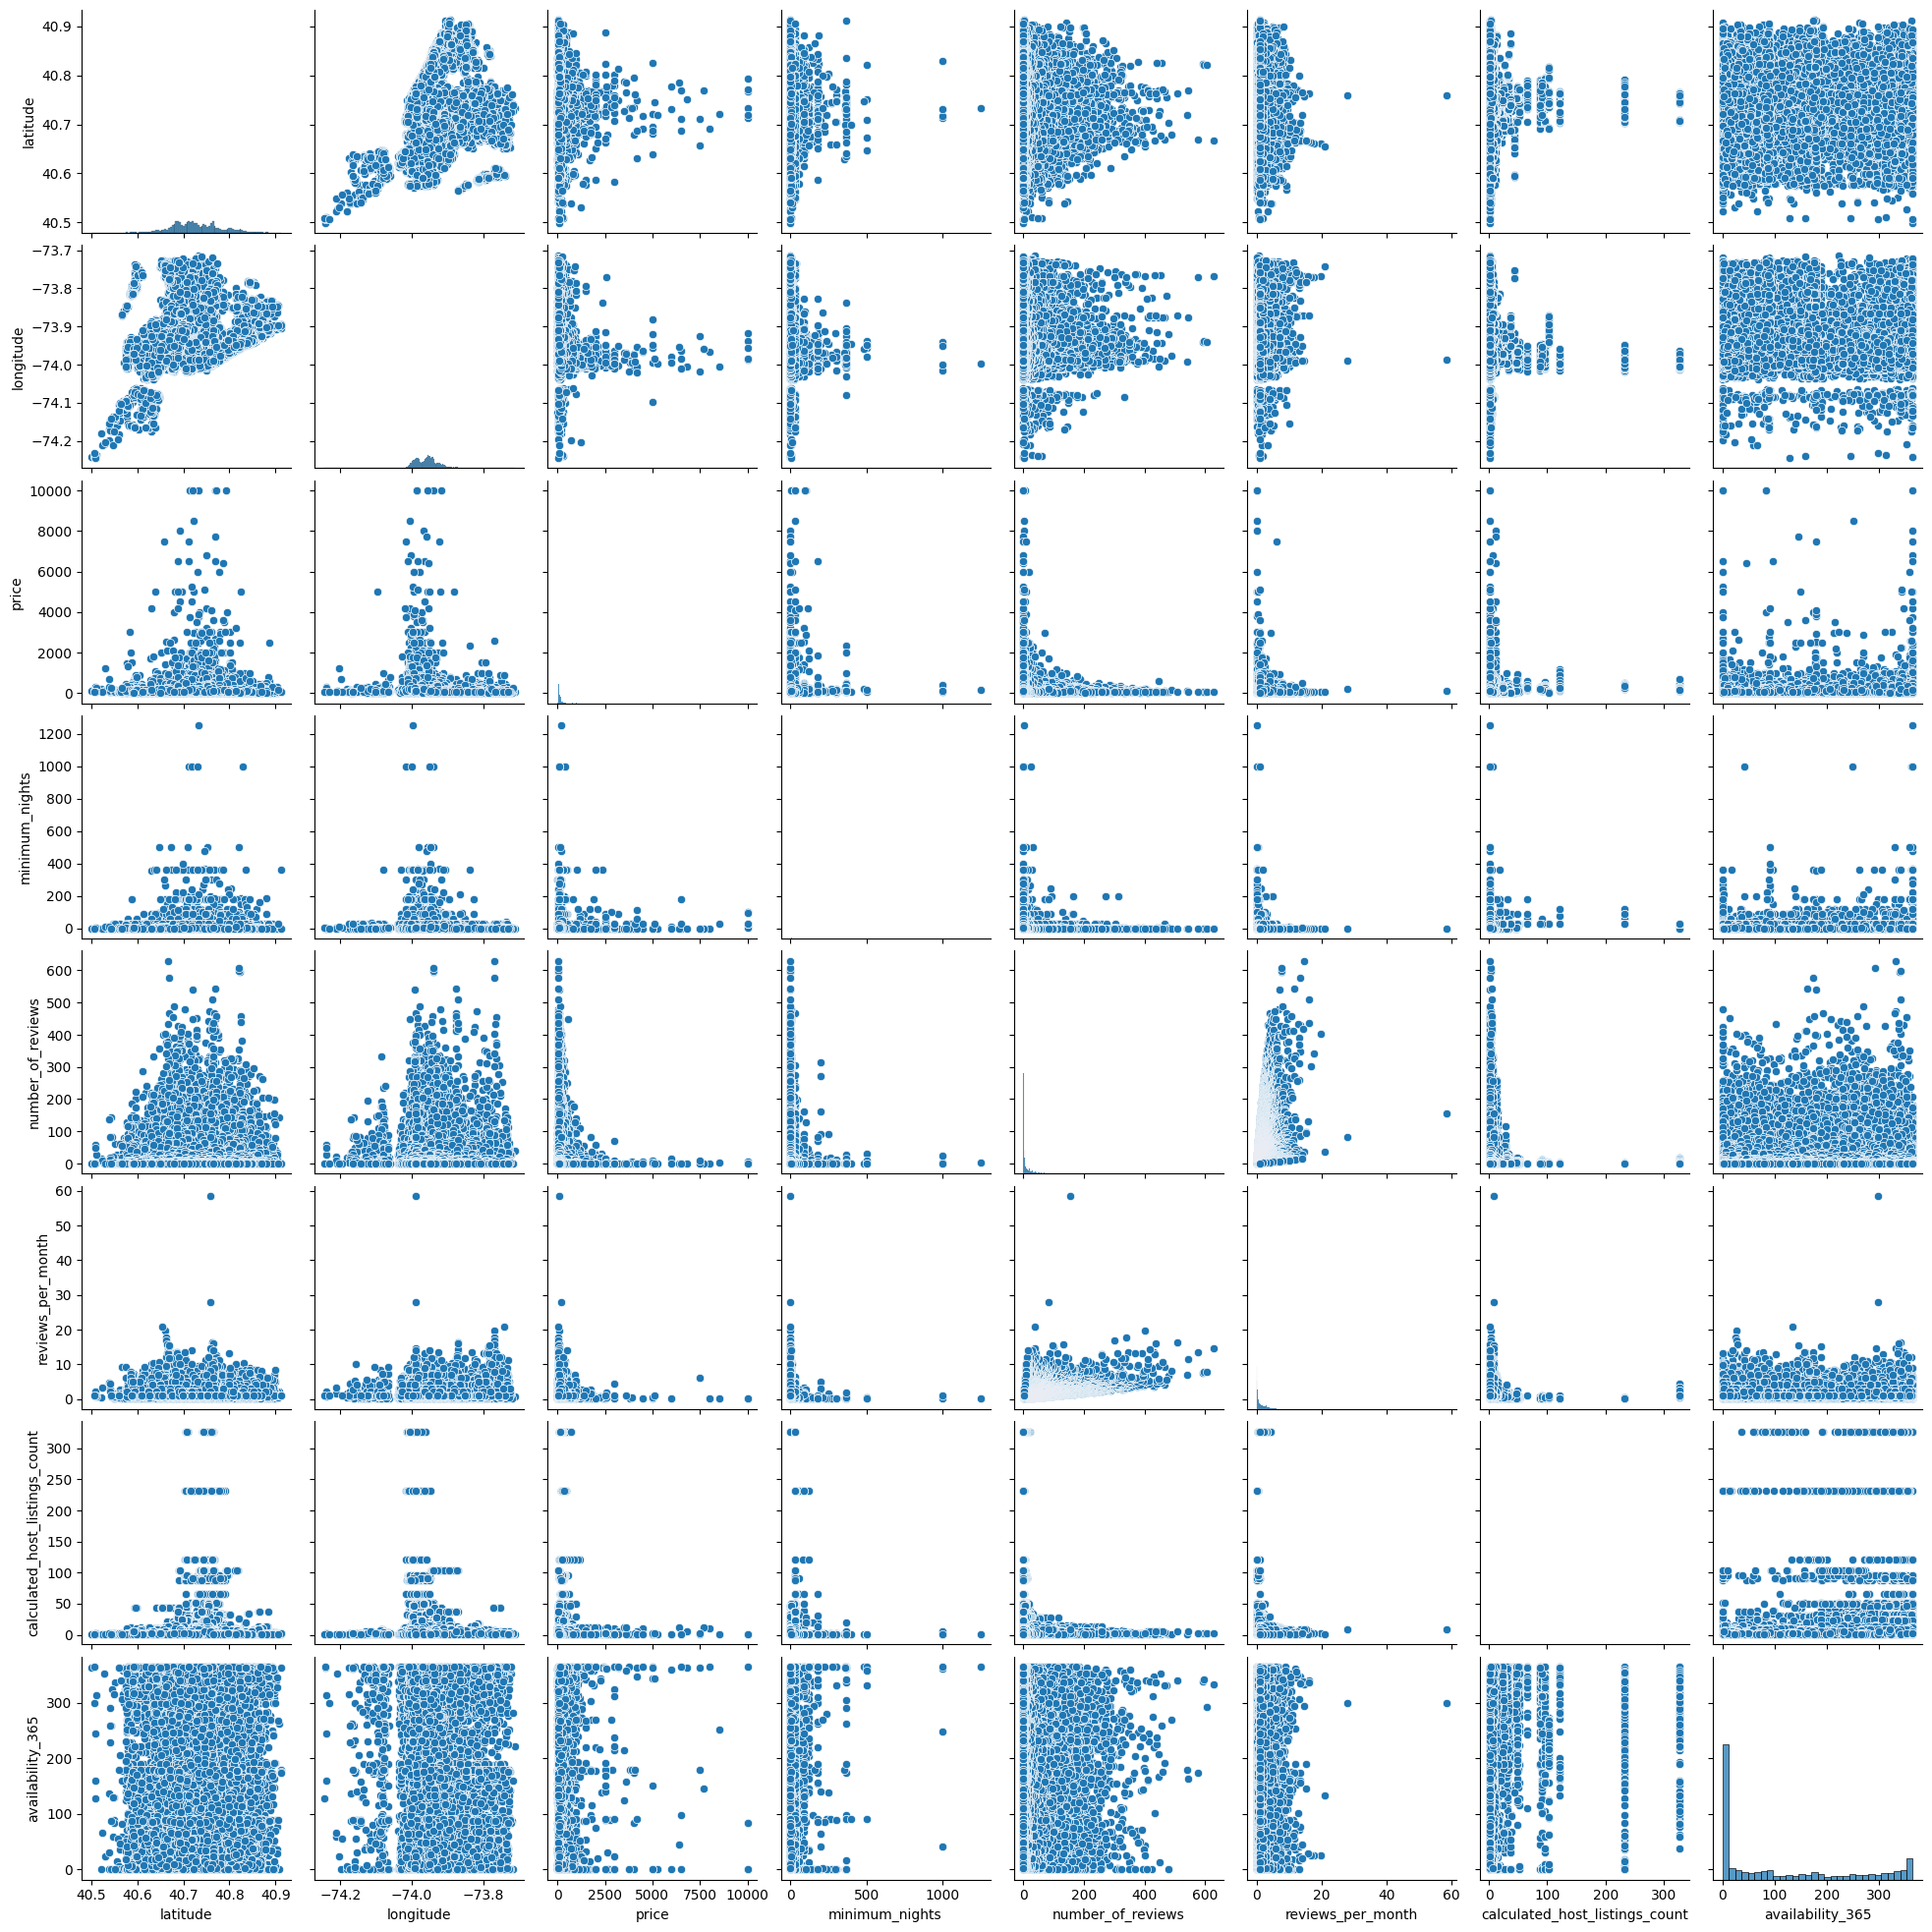

In [5]:
sns.pairplot(df);

In [520]:
from sklearn.preprocessing import OrdinalEncoder
df_corr = df.copy()
enc = OrdinalEncoder()
df_corr[['neighbourhood_group','neighbourhood', 'room_type']] = enc.fit_transform(df_corr[['neighbourhood_group','neighbourhood', 'room_type']])
df_corr.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,
2539,1.0,108.0,40.64749,-73.97237,1.0,149,1,9,0.21,6,365
2595,2.0,127.0,40.75362,-73.98377,0.0,225,1,45,0.38,2,355
3647,2.0,94.0,40.80902,-73.94190,1.0,150,3,0,NaN,1,365
3831,1.0,41.0,40.68514,-73.95976,0.0,89,1,270,4.64,1,194
5022,2.0,61.0,40.79851,-73.94399,0.0,80,10,9,0.10,1,0


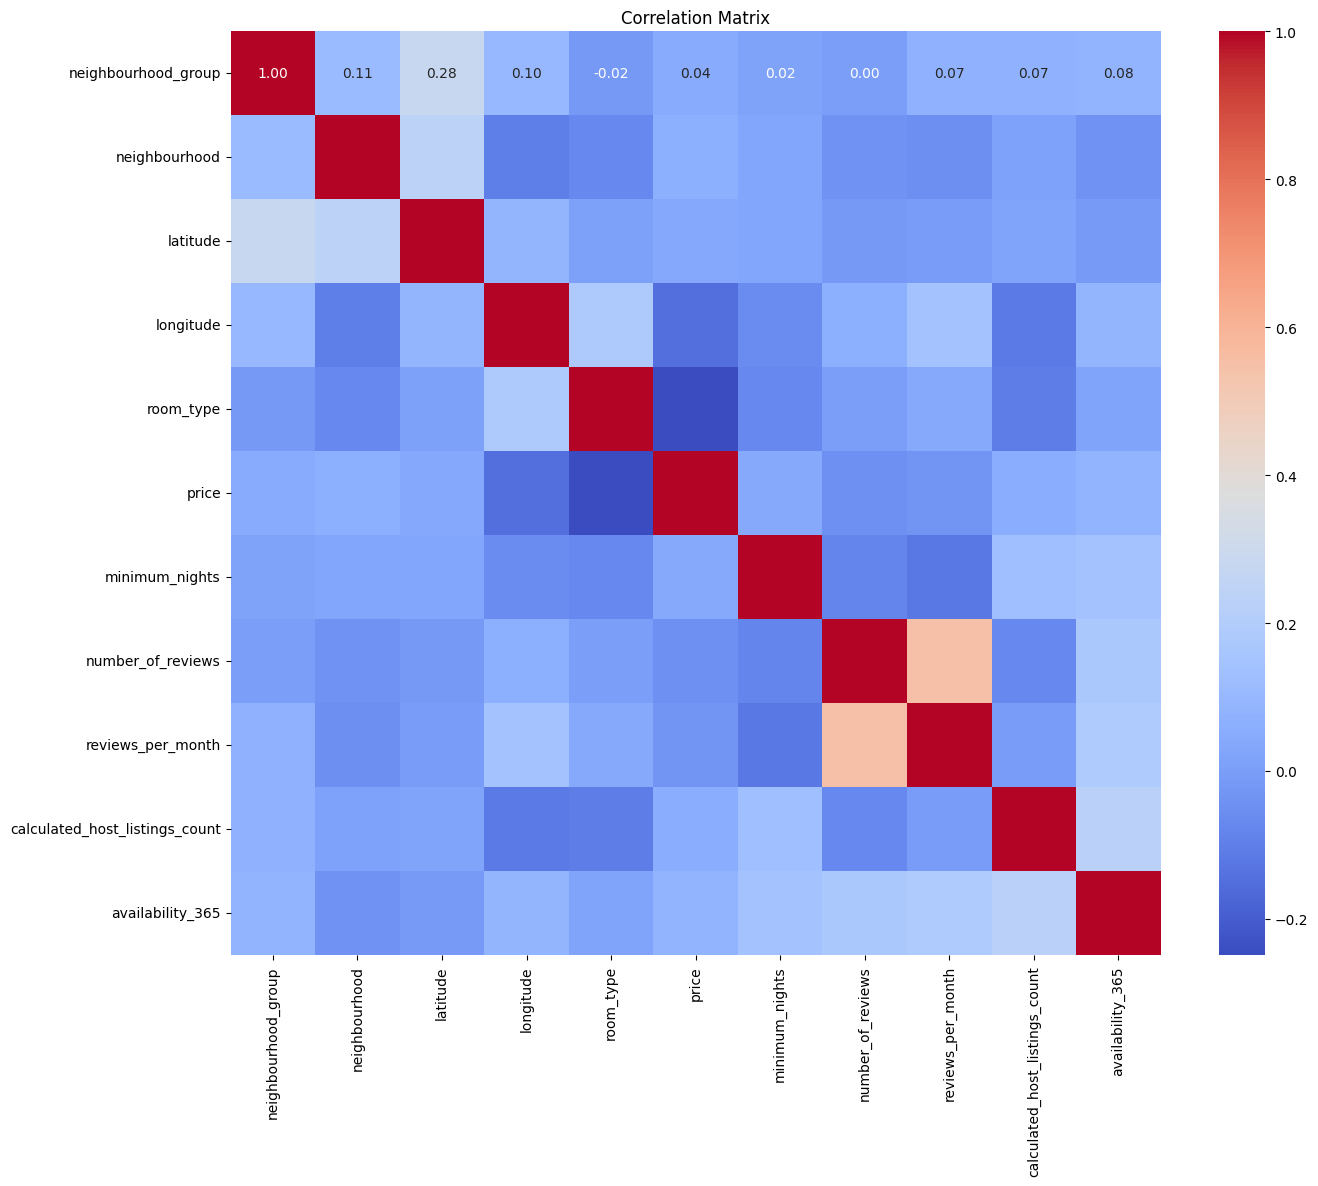

In [521]:
plt.figure(figsize=(15, 12))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [301]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

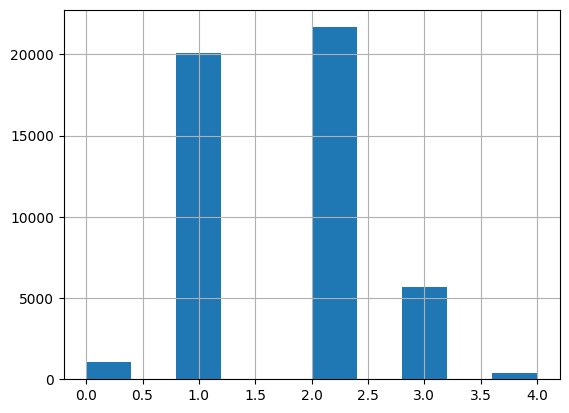

In [79]:
df_corr['neighbourhood_group'].hist();

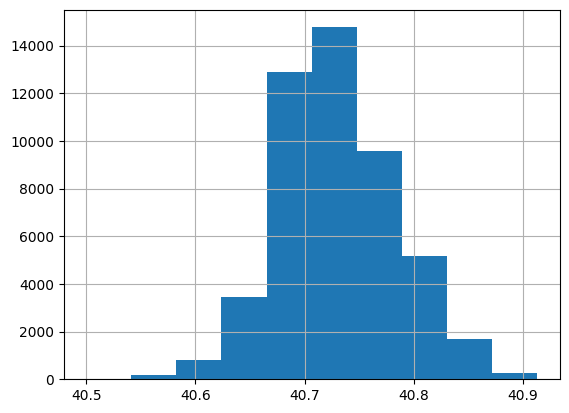

In [80]:
df_corr['latitude'].hist();

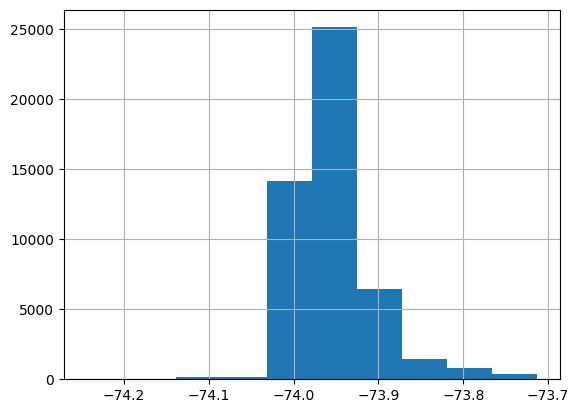

In [81]:
df_corr['longitude'].hist();

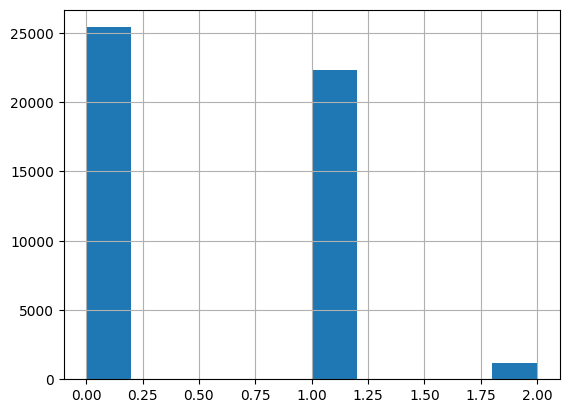

In [82]:
df_corr['room_type'].hist();

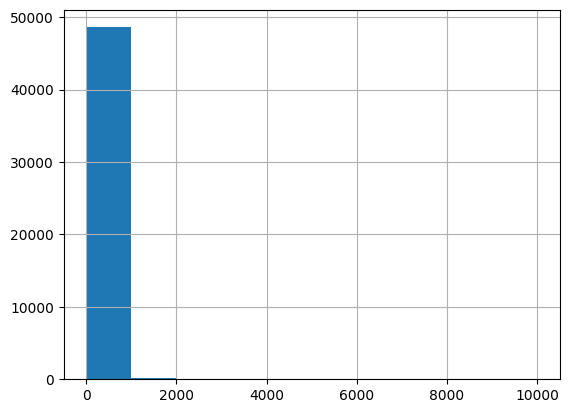

In [629]:
df_corr['price'].hist();

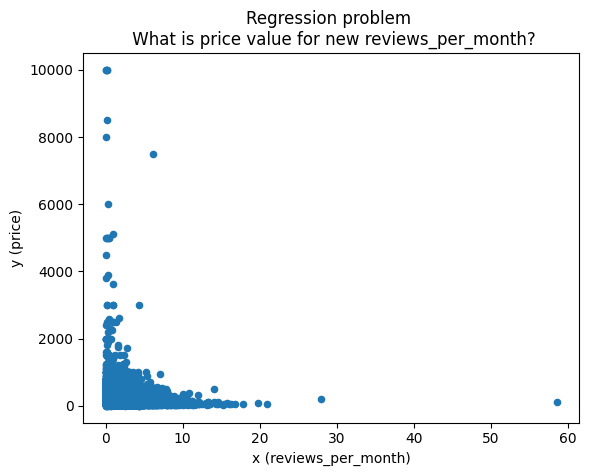

In [638]:
df_corr.plot.scatter('reviews_per_month', 'price')
plt.title("Regression problem \n What is price value for new reviews_per_month?")
plt.xlabel("x (reviews_per_month)")
plt.ylabel("y (price)");

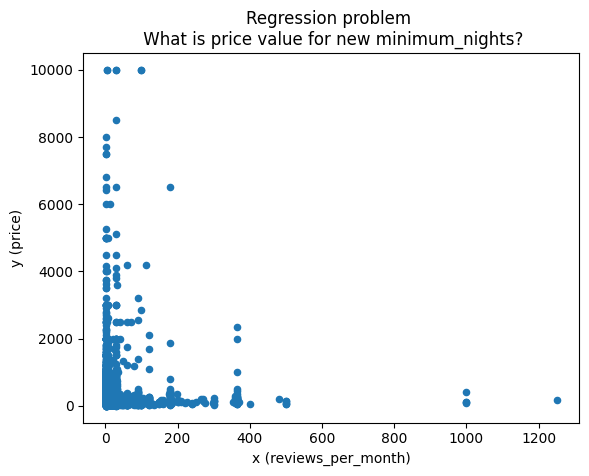

In [639]:
df_corr.plot.scatter('minimum_nights', 'price')
plt.title("Regression problem \n What is price value for new minimum_nights?")
plt.xlabel("x (reviews_per_month)")
plt.ylabel("y (price)");

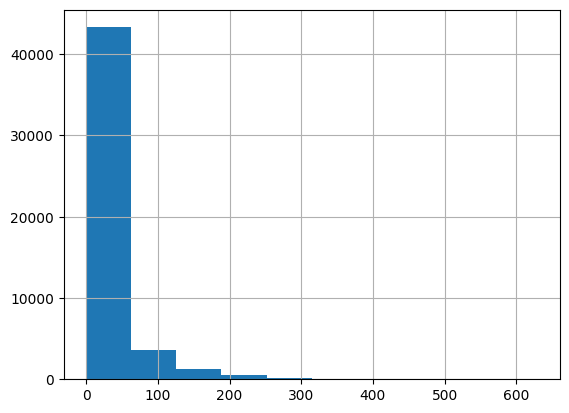

In [85]:
df_corr['number_of_reviews'].hist();

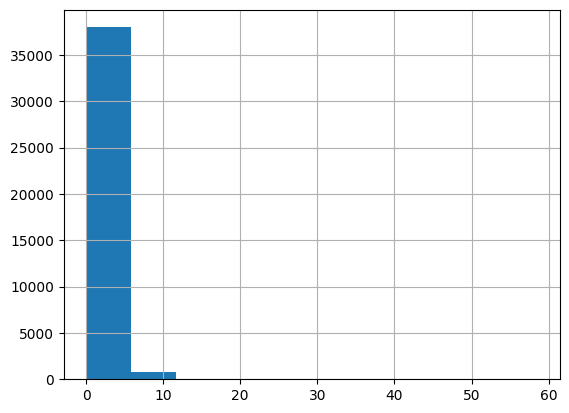

In [86]:
df_corr['reviews_per_month'].hist();

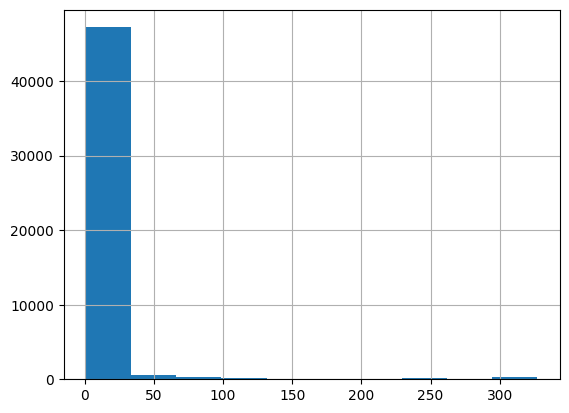

In [87]:
df_corr['calculated_host_listings_count'].hist();

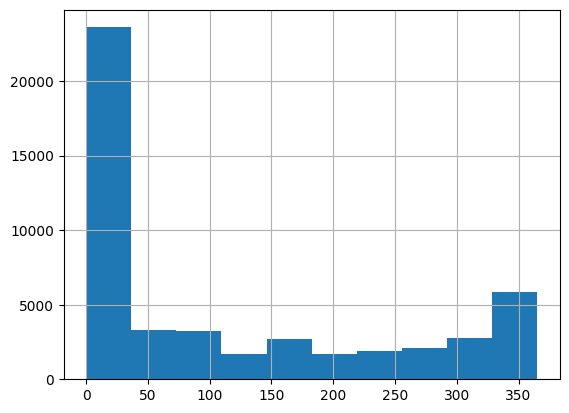

In [88]:
df_corr['availability_365'].hist();

## Часть 2. Preprocessing & Feature Engineerin

In [ ]:
#### Чистим от null значений

In [522]:
df.isnull().any()

neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [523]:
df['reviews_per_month'].unique()

array([2.100e-01, 3.800e-01,       nan, 4.640e+00, 1.000e-01, 5.900e-01,
       4.000e-01, 3.470e+00, 9.900e-01, 1.330e+00, 4.300e-01, 1.500e+00,
       1.340e+00, 9.100e-01, 2.200e-01, 1.200e+00, 1.720e+00, 2.120e+00,
       4.440e+00, 7.000e-02, 1.090e+00, 3.700e-01, 6.100e-01, 7.300e-01,
       1.370e+00, 4.900e-01, 1.110e+00, 2.400e-01, 2.040e+00, 1.420e+00,
       1.650e+00, 2.370e+00, 6.600e-01, 1.410e+00, 1.960e+00, 1.810e+00,
       2.080e+00, 3.900e-01, 2.300e-01, 6.900e-01, 8.400e-01, 2.250e+00,
       5.200e-01, 1.160e+00, 1.010e+00, 6.300e-01, 7.000e-01, 2.820e+00,
       9.000e-01, 1.700e-01, 2.490e+00, 1.190e+00, 3.000e-01, 1.200e-01,
       5.700e-01, 1.600e-01, 4.720e+00, 1.400e+00, 1.260e+00, 1.640e+00,
       1.600e+00, 9.200e-01, 2.000e-01, 1.280e+00, 5.400e-01, 6.200e-01,
       1.500e-01, 5.300e-01, 1.730e+00, 5.000e-02, 1.540e+00, 2.800e-01,
       3.400e+00, 1.570e+00, 1.050e+00, 7.100e-01, 1.100e-01, 2.700e-01,
       1.230e+00, 8.700e-01, 2.090e+00, 6.000e-01, 

In [524]:
df.shape

(48895, 11)

In [525]:
df['reviews_per_month'].mean()

1.3732214298586618

#### null знячения заменяем средней

In [526]:
df.loc[:, 'reviews_per_month'] = df.reviews_per_month.fillna(df['reviews_per_month'].mean())

In [527]:
df.isnull().any()

neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [528]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.497775,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## 2.1 Категориальные переменные

In [529]:
import pandas as pd 

df_dummy = df.copy()

In [ ]:
#df_corr[['neighbourhood_group','neighbourhood', 'room_type']] = enc.fit_transform(df_corr[['neighbourhood_group','neighbourhood', 'room_type']])

### 2.1.1 Dummy

In [530]:

# calling the get_dummies method 
# the first parameter mentions the 
# the name of the data frame to store the 
# new data frame in 
# the second parameter is the list of 
# columns which if not mentioned 
# returns the dummies for all 
# categorical columns 
df_dummy = pd.get_dummies(df_dummy, columns = ['neighbourhood_group', 'neighbourhood', 'room_type']) 
  
display(df_dummy) 

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
id,,,,,,,,,,,,,,,,,,,,,
2539,40.64749,-73.97237,149,1,9,0.210000,6,365,False,True,...,False,False,False,False,False,False,False,False,True,False
2595,40.75362,-73.98377,225,1,45,0.380000,2,355,False,False,...,False,False,False,False,False,False,False,True,False,False
3647,40.80902,-73.94190,150,3,0,1.373221,1,365,False,False,...,False,False,False,False,False,False,False,False,True,False
3831,40.68514,-73.95976,89,1,270,4.640000,1,194,False,True,...,False,False,False,False,False,False,False,True,False,False
5022,40.79851,-73.94399,80,10,9,0.100000,1,0,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484665,40.67853,-73.94995,70,2,0,1.373221,2,9,False,True,...,False,False,False,False,False,False,False,False,True,False
36485057,40.70184,-73.93317,40,4,0,1.373221,2,36,False,True,...,False,False,False,False,False,False,False,False,True,False
36485431,40.81475,-73.94867,115,10,0,1.373221,1,27,False,False,...,False,False,False,False,False,False,False,True,False,False


###  2.1.2 OrdinalEncoder

In [531]:
df_order = df.copy()
enc = OrdinalEncoder()
df_order[['neighbourhood_group','neighbourhood', 'room_type']] = enc.fit_transform(df_order[['neighbourhood_group','neighbourhood', 'room_type']])
df_order.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,
2539,1.0,108.0,40.64749,-73.97237,1.0,149,1,9,0.210000,6,365
2595,2.0,127.0,40.75362,-73.98377,0.0,225,1,45,0.380000,2,355
3647,2.0,94.0,40.80902,-73.94190,1.0,150,3,0,1.373221,1,365
3831,1.0,41.0,40.68514,-73.95976,0.0,89,1,270,4.640000,1,194
5022,2.0,61.0,40.79851,-73.94399,0.0,80,10,9,0.100000,1,0


### 2.1.3 CountEncoder

In [532]:
from category_encoders import CountEncoder

df_count_enc = df.copy()

enc = CountEncoder()
#data_count_enc = encode_func(df_count_enc, enc)
df_count_enc[['neighbourhood_group','neighbourhood', 'room_type']] = enc.fit_transform(df_count_enc[['neighbourhood_group','neighbourhood', 'room_type']])
df_count_enc.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,
2539,20104,175,40.64749,-73.97237,22326,149,1,9,0.210000,6,365
2595,21661,1545,40.75362,-73.98377,25409,225,1,45,0.380000,2,355
3647,21661,2658,40.80902,-73.94190,22326,150,3,0,1.373221,1,365
3831,20104,572,40.68514,-73.95976,25409,89,1,270,4.640000,1,194
5022,21661,1117,40.79851,-73.94399,25409,80,10,9,0.100000,1,0


### 2.1.4 OneHotEncoding

In [533]:
from category_encoders import OrdinalEncoder, OneHotEncoder

df_one_hot_enc = df.copy()
one_hot_enc = OneHotEncoder()

df_one_hot_enc = df_one_hot_enc.drop(['neighbourhood_group','neighbourhood', 'room_type'], axis = 1).join(one_hot_enc.fit_transform(df_one_hot_enc[['neighbourhood_group','neighbourhood', 'room_type']], axis = 0))
df_one_hot_enc.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_1,neighbourhood_group_2,...,neighbourhood_215,neighbourhood_216,neighbourhood_217,neighbourhood_218,neighbourhood_219,neighbourhood_220,neighbourhood_221,room_type_1,room_type_2,room_type_3
id,,,,,,,,,,,,,,,,,,,,,
2539,40.64749,-73.97237,149,1,9,0.210000,6,365,1,0,...,0,0,0,0,0,0,0,1,0,0
2595,40.75362,-73.98377,225,1,45,0.380000,2,355,0,1,...,0,0,0,0,0,0,0,0,1,0
3647,40.80902,-73.94190,150,3,0,1.373221,1,365,0,1,...,0,0,0,0,0,0,0,1,0,0
3831,40.68514,-73.95976,89,1,270,4.640000,1,194,1,0,...,0,0,0,0,0,0,0,0,1,0
5022,40.79851,-73.94399,80,10,9,0.100000,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


## 2.2 Замена аномалий

In [27]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    
    q75 = data.quantile(0.75)
   # data_mean = data.mean()
    #hight_boundary = data_mean
    #if q75 > data_mean:
    #    hight_boundary = q75             
    
    #iqr = hight_boundary - q25
    #boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    #boundaries = (q25 - 1.5 * iqr, hight_boundary + 1.5 * iqr)
    boundaries = (q25 - 1.5 * iqr, hight_boundary + 1.5 * iqr)
    return boundaries

#### Используем правило трех сигм и определяем границы

In [534]:
def calculate_outliers_std(data):

    data_std = data.std()    
    boundaries = (data_std * (-3), data_std * 3 )
   # boundaries = (data_std * (-3), data_std * 2 )
    boundaries = (data_std * (-3), data.quantile(0.95) )
    
    return boundaries

In [535]:
boundaries = calculate_outliers_std(df.minimum_nights)
boundaries

(-61.531648599541334, 30.0)

#### Посмотрим какие границы ниже нижней границы, а какие больше верхней

In [536]:
is_outlier = ( df.minimum_nights < boundaries[0] ) | (df.minimum_nights > boundaries[1])
is_outlier

id
2539        False
2595        False
3647        False
3831        False
5022        False
            ...  
36484665    False
36485057    False
36485431    False
36485609    False
36487245    False
Name: minimum_nights, Length: 48895, dtype: bool

In [537]:
is_outlier.sum()

747

In [538]:
is_outlier.sum() / len( df_dummy)

0.015277635750076695

In [540]:
index_price = df[ (df['minimum_nights'] > int(boundaries[1]))].index 
  
# drop these given row 
# indexes from dataFrame 
df_dummy.drop(index_price, inplace = True) 
df_order.drop(index_price, inplace = True) 
df_count_enc.drop(index_price, inplace = True) 
df_one_hot_enc.drop(index_price, inplace = True) 

In [541]:
df_order.shape

(48148, 11)

#### количество аномальных значений меньше 1 процента, а значит заменяем их на значение максимальной границы

In [459]:
#df_dummy.loc[is_outlier, 'minimum_nights'] = int(boundaries[1]) 
#df_order.loc[is_outlier, 'minimum_nights'] = int(boundaries[1]) 
#df_count_enc.loc[is_outlier, 'minimum_nights'] = int(boundaries[1]) 
#df_one_hot_enc.loc[is_outlier, 'minimum_nights'] = int(boundaries[1]) 

In [460]:
df_dummy.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,44048.000000,44048.000000,44048.000000,44048.000000,44048.000000,35973.000000,44048.000000,44048.000000
mean,40.727995,-73.950815,148.460203,3.314362,24.965424,1.442553,3.367372,100.364443
std,0.055371,0.046970,210.061167,3.646272,46.041924,1.715290,21.557798,125.940732
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.688840,-73.982260,69.000000,1.000000,1.000000,0.210000,1.000000,0.000000
50%,40.721310,-73.954580,100.000000,2.000000,6.000000,0.810000,1.000000,29.000000
75%,40.762943,-73.934560,175.000000,4.000000,26.000000,2.160000,2.000000,185.000000
max,40.913060,-73.712990,10000.000000,28.000000,629.000000,58.500000,327.000000,365.000000


In [542]:
boundaries_price = calculate_outliers_std(df_dummy.price)
boundaries_price

(-678.4932964810998, 350.0)

In [543]:
is_outlier_price = ( df_dummy.price < boundaries_price[0] ) | (df_dummy.price > boundaries_price[1])
is_outlier_price

id
2539        False
2595        False
3647        False
3831        False
5022        False
            ...  
36484665    False
36485057    False
36485431    False
36485609    False
36487245    False
Name: price, Length: 48148, dtype: bool

In [544]:
is_outlier_price.sum()

2404

In [545]:
index_price = df_dummy[ (df_dummy['price'] > int(boundaries_price[1]))].index 
  
# drop these given row 
# indexes from dataFrame 
df_dummy.drop(index_price, inplace = True) 
df_order.drop(index_price, inplace = True) 
df_count_enc.drop(index_price, inplace = True) 
df_one_hot_enc.drop(index_price, inplace = True) 

In [419]:
#df_dummy.loc[is_outlier_price, 'price'] = int(boundaries_price[1]) 
#df_order.loc[is_outlier_price, 'price'] = int(boundaries_price[1]) 
#df_count_enc.loc[is_outlier_price, 'price'] = int(boundaries_price[1]) 
#df_one_hot_enc.loc[is_outlier_price, 'price'] = int(boundaries_price[1]) 


In [546]:
df_dummy.shape

(45744, 237)

In [471]:
df_one_hot_enc.price.describe()

count    41880.000000
mean       120.636270
std         70.780564
min          0.000000
25%         65.000000
50%        100.000000
75%        155.000000
max        350.000000
Name: price, dtype: float64

#### calculated_host_listings_count

In [547]:
boundaries_calculated_host_listings_count = calculate_outliers_std(df_dummy.calculated_host_listings_count)
boundaries_calculated_host_listings_count

(-93.51297535274216, 13.0)

In [548]:
is_outlier_calculated_host_listings_count = ( df_dummy.calculated_host_listings_count < boundaries_calculated_host_listings_count[0] ) | (df_dummy.calculated_host_listings_count > boundaries_calculated_host_listings_count[1])
is_outlier_calculated_host_listings_count.sum()

2242

In [549]:
index_calculated_host_listings_count = df_dummy[ (df_dummy['calculated_host_listings_count'] > int(boundaries_calculated_host_listings_count[1]))].index 
  
# drop these given row 
# indexes from dataFrame 
df_dummy.drop(index_calculated_host_listings_count, inplace = True) 
df_order.drop(index_calculated_host_listings_count, inplace = True) 
df_count_enc.drop(index_calculated_host_listings_count, inplace = True) 
df_one_hot_enc.drop(index_calculated_host_listings_count, inplace = True) 


In [329]:
#df_dummy.loc[is_outlier_calculated_host_listings_count, 'calculated_host_listings_count'] = int(boundaries_calculated_host_listings_count[1]) 
#df_order.loc[is_outlier_calculated_host_listings_count, 'calculated_host_listings_count'] = int(boundaries_calculated_host_listings_count[1]) 
#df_count_enc.loc[is_outlier_calculated_host_listings_count, 'calculated_host_listings_count'] = int(boundaries_calculated_host_listings_count[1]) 
#df_one_hot_enc.loc[is_outlier_calculated_host_listings_count, 'calculated_host_listings_count'] = int(boundaries_calculated_host_listings_count[1]) 

In [550]:
df_one_hot_enc.shape

(43502, 237)

#### number_of_review

In [280]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [551]:
boundaries_number_of_review = calculate_outliers_std(df_dummy.number_of_reviews)
boundaries_number_of_review

(-138.6266826405928, 119.94999999999709)

In [552]:
is_outlier_number_of_review = ( df_dummy.number_of_reviews < boundaries_number_of_review[0] ) | (df_dummy.number_of_reviews > boundaries_number_of_review[1])
is_outlier_number_of_review

id
2539        False
2595        False
3647        False
3831         True
5022        False
            ...  
36484665    False
36485057    False
36485431    False
36485609    False
36487245    False
Name: number_of_reviews, Length: 43502, dtype: bool

In [553]:
is_outlier_number_of_review.sum()

2176

In [554]:
index_calculated_host_listings_count = df_dummy[ (df_dummy['number_of_reviews'] > int(boundaries_number_of_review[1]))].index 
  
# drop these given row 
# indexes from dataFrame 
df_dummy.drop(index_calculated_host_listings_count, inplace = True) 
df_order.drop(index_calculated_host_listings_count, inplace = True) 
df_count_enc.drop(index_calculated_host_listings_count, inplace = True) 
df_one_hot_enc.drop(index_calculated_host_listings_count, inplace = True) 

In [555]:
df_one_hot_enc.shape

(41326, 237)

In [332]:
#df_dummy.loc[is_outlier_number_of_review, 'number_of_reviews'] = int(boundaries_number_of_review[1]) 
#df_order.loc[is_outlier_number_of_review, 'number_of_reviews'] = int(boundaries_number_of_review[1]) 
#df_count_enc.loc[is_outlier_number_of_review, 'number_of_reviews'] = int(boundaries_number_of_review[1]) 
#df_one_hot_enc.loc[is_outlier_number_of_review, 'number_of_reviews'] = int(boundaries_number_of_review[1]) 

#### reviews_per_month

In [556]:
boundaries_reviews_per_month = calculate_outliers_std(df_dummy.reviews_per_month)
boundaries_reviews_per_month

(-4.145956557978423, 4.04)

In [557]:
is_outlier_reviews_per_month = ( df_dummy.reviews_per_month < boundaries_reviews_per_month[0] ) | (df_dummy.reviews_per_month > boundaries_reviews_per_month[1])
is_outlier_reviews_per_month.sum()

2059

In [560]:
index_reviews_per_month = df_dummy[ (df_dummy['reviews_per_month'] > int(boundaries_reviews_per_month[1]))].index 
  
# drop these given row 
# indexes from dataFrame 
df_dummy.drop(index_reviews_per_month, inplace = True) 
df_order.drop(index_reviews_per_month, inplace = True) 
df_count_enc.drop(index_reviews_per_month, inplace = True) 
df_one_hot_enc.drop(index_reviews_per_month, inplace = True) 

In [562]:
df_dummy.shape

(39217, 237)

In [486]:
#df_dummy.loc[is_outlier_reviews_per_month, 'reviews_per_month'] = int(boundaries_reviews_per_month[1]) 
#df_order.loc[is_outlier_reviews_per_month, 'reviews_per_month'] = int(boundaries_reviews_per_month[1]) 
#df_count_enc.loc[is_outlier_reviews_per_month, 'reviews_per_month'] = int(boundaries_reviews_per_month[1]) 
#df_one_hot_enc.loc[is_outlier_reviews_per_month, 'reviews_per_month'] = int(boundaries_reviews_per_month[1]) 

#### availability_365

In [563]:
boundaries_availability_365 = calculate_outliers_std(df_dummy.availability_365)
boundaries_availability_365

(-374.4937430085256, 355.0)

In [564]:
is_outlier_availability_365 = ( df_dummy.availability_365 < boundaries_availability_365[0] ) | (df_dummy.availability_365 > boundaries_availability_365[1])
is_outlier_availability_365.sum()

1938

In [565]:
index_availability_365 = df_dummy[ (df_dummy['availability_365'] > int(boundaries_availability_365[1]))].index 
  
# drop these given row 
# indexes from dataFrame 
df_dummy.drop(index_availability_365, inplace = True) 
df_order.drop(index_availability_365, inplace = True) 
df_count_enc.drop(index_availability_365, inplace = True) 
df_one_hot_enc.drop(index_availability_365, inplace = True) 

In [489]:
#df_dummy.loc[is_outlier_availability_365, 'availability_365'] = int(boundaries_availability_365[1]) 
#df_order.loc[is_outlier_availability_365, 'availability_365'] = int(boundaries_availability_365[1]) 
#df_count_enc.loc[is_outlier_availability_365, 'availability_365'] = int(boundaries_availability_365[1]) 
#df_one_hot_enc.loc[is_outlier_availability_365, 'availability_365'] = int(boundaries_availability_365[1]) 

In [566]:
df_one_hot_enc.shape

(37279, 237)

In [490]:
df_one_hot_enc.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_1,neighbourhood_group_2,...,neighbourhood_215,neighbourhood_216,neighbourhood_217,neighbourhood_218,neighbourhood_219,neighbourhood_220,neighbourhood_221,room_type_1,room_type_2,room_type_3
count,9.000000,9.000000,9.0,9.000000,9.000000,8.000000,9.000000,9.000000,9.000000,9.000000,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.000000,9.000000,9.0
mean,40.716541,-73.929599,0.0,2.333333,41.111111,2.078750,3.888889,94.888889,0.777778,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.777778,0.222222,0.0
std,0.049423,0.027157,0.0,1.414214,43.189826,1.928541,2.088327,95.819419,0.440959,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.440959,0.440959,0.0
min,40.681730,-73.975970,0.0,1.000000,0.000000,0.050000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
25%,40.682790,-73.946450,0.0,1.000000,3.000000,0.435000,2.000000,0.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0
50%,40.694670,-73.924330,0.0,2.000000,16.000000,1.635000,4.000000,73.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0
75%,40.724620,-73.912840,0.0,3.000000,93.000000,4.070000,6.000000,176.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0
max,40.832960,-73.886680,0.0,5.000000,95.000000,4.350000,6.000000,228.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0


#### 2.3 Шкалирования непрерывных переменных (StandardScaler, RobustScaler) 

In [292]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

def set_scaller(data):
    df_dummy_std_scaller = data.copy()
    std_scaler_dummy = StandardScaler()
    #идентификация параметров преобразования для признаков
    std_scaler_dummy.fit(df_dummy_std_scaller[['availability_365', 'reviews_per_month', 'number_of_reviews', 'minimum_nights', 'calculated_host_listings_count']])
    #нормализуем данные
    std_scaler_dummy = std_scaler_dummy.transform(df_dummy_std_scaller[['availability_365', 'reviews_per_month', 'number_of_reviews', 'minimum_nights', 'calculated_host_listings_count']])
    df_dummy_std_scaller[['std_scaled_availability_365', 'std_scaled_reviews_per_month', 'std_scaled_number_of_reviews', 'std_scaled_minimum_nights', 'std_scaled_calculated_host_listings_count']] = std_scaler_dummy

    df_dummy_std_scaller.drop(columns=['availability_365', 'reviews_per_month', 'number_of_reviews', 'minimum_nights', 'calculated_host_listings_count'], inplace=True)

    df_dummy_robust_scaller = data.copy()
    robust_scaler_dummy = RobustScaler()
    #идентификация параметров преобразования для признаков
    robust_scaler_dummy.fit(df_dummy_robust_scaller[['availability_365', 'reviews_per_month', 'number_of_reviews', 'minimum_nights', 'calculated_host_listings_count']])
    #нормализуем данные
    robust_scaler_dummy = robust_scaler_dummy.transform(df_dummy_robust_scaller[['availability_365', 'reviews_per_month', 'number_of_reviews', 'minimum_nights', 'calculated_host_listings_count']])
    df_dummy_robust_scaller[['robust_scaled_availability_365', 'robust_scaled_reviews_per_month', 'robust_scaled_number_of_reviews', 'robust_scaled_minimum_nights', 'robust_scaled_calculated_host_listings_count']] = robust_scaler_dummy

    df_dummy_robust_scaller.drop(columns=['availability_365', 'reviews_per_month', 'number_of_reviews', 'minimum_nights', 'calculated_host_listings_count'], inplace=True)

    return df_dummy_std_scaller, df_dummy_robust_scaller
    
    

##### для dummy, order, count, one_hot scaler

In [567]:
result_dummy_scaller = set_scaller(df_dummy)
result_order_scaller = set_scaller(df_order)
result_count_scaller = set_scaller(df_count_enc)
result_one_hot_scaller = set_scaller(df_one_hot_enc)
result_one_hot_scaller[1].shape

(37279, 237)

In [572]:
result_one_hot_scaller[1].head()

,latitude,longitude,price,neighbourhood_group_1,neighbourhood_group_2,neighbourhood_group_3,neighbourhood_group_4,neighbourhood_group_5,neighbourhood_1,neighbourhood_2,...,neighbourhood_220,neighbourhood_221,room_type_1,room_type_2,room_type_3,robust_scaled_availability_365,robust_scaled_reviews_per_month,robust_scaled_number_of_reviews,robust_scaled_minimum_nights,robust_scaled_calculated_host_listings_count
id,,,,,,,,,,,,,,,,,,,,,
2595,40.75362,-73.98377,225,0,1,0,0,0,0,1,...,0,0,0,1,0,2.419580,-0.507338,2.222222,-0.666667,1.0
5022,40.79851,-73.94399,80,0,1,0,0,0,0,0,...,0,0,0,1,0,-0.062937,-0.752260,0.222222,2.333333,0.0
5099,40.74767,-73.97500,200,0,1,0,0,0,0,0,...,0,0,0,1,0,0.839161,-0.323647,3.833333,0.000000,0.0
5203,40.80178,-73.96723,79,0,1,0,0,0,0,0,...,0,0,1,0,0,-0.062937,0.026242,6.277778,-0.333333,0.0
5295,40.80316,-73.96545,135,0,1,0,0,0,0,0,...,0,0,0,1,0,-0.020979,-0.463602,2.666667,0.666667,0.0


### 2.4 Вводим два признака широта: расстояние Манхэттена и Евклидово

#### Широта, долгота Манхэттена: 40.7834, -73.9662

In [568]:
manchaton_latitude = 40.7834
manchaton_longitude = -73.9662

### Признак координаты Манхэттена

In [493]:
import numpy as np


def cal_manhattan(x_2, y_2):    
    
    distance_manch = np.abs( manchaton_latitude - x_2 ) + np.abs( manchaton_longitude - y_2 )
    return distance_manch

#### для dummy добавляем признак distance_manchatan

In [575]:
dummy_std_scaller = result_dummy_scaller[0].copy()
#dummy_std_scaller['distance_manchatan'] = dummy_std_scaller.apply( lambda x: cal_manhattan( x.latitude, x.longitude), axis=1)

dummy_robusr_scaller = result_dummy_scaller[1].copy()
#dummy_robusr_scaller['distance_manchatan'] = dummy_robusr_scaller.apply( lambda x: cal_manhattan( x.latitude, x.longitude), axis=1)

dummy_robusr_scaller.head()

,latitude,longitude,price,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,...,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,robust_scaled_availability_365,robust_scaled_reviews_per_month,robust_scaled_number_of_reviews,robust_scaled_minimum_nights,robust_scaled_calculated_host_listings_count
id,,,,,,,,,,,,,,,,,,,,,
2595,40.75362,-73.98377,225,False,False,True,False,False,False,False,...,False,False,True,False,False,2.419580,-0.507338,2.222222,-0.666667,1.0
5022,40.79851,-73.94399,80,False,False,True,False,False,False,False,...,False,False,True,False,False,-0.062937,-0.752260,0.222222,2.333333,0.0
5099,40.74767,-73.97500,200,False,False,True,False,False,False,False,...,False,False,True,False,False,0.839161,-0.323647,3.833333,0.000000,0.0
5203,40.80178,-73.96723,79,False,False,True,False,False,False,False,...,False,False,False,True,False,-0.062937,0.026242,6.277778,-0.333333,0.0
5295,40.80316,-73.96545,135,False,False,True,False,False,False,False,...,False,False,True,False,False,-0.020979,-0.463602,2.666667,0.666667,0.0


#### для order добавляем признак distance_manchatan

In [576]:
order_std_scaller = result_order_scaller[0].copy()
#order_std_scaller['distance_manchatan'] = order_std_scaller.apply( lambda x: cal_manhattan( x.latitude, x.longitude), axis=1)

order_robusr_scaller = result_order_scaller[1].copy()
#order_robusr_scaller['distance_manchatan'] = order_robusr_scaller.apply( lambda x: cal_manhattan( x.latitude, x.longitude), axis=1)

order_robusr_scaller.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,robust_scaled_availability_365,robust_scaled_reviews_per_month,robust_scaled_number_of_reviews,robust_scaled_minimum_nights,robust_scaled_calculated_host_listings_count
id,,,,,,,,,,,
2595,2.0,127.0,40.75362,-73.98377,0.0,225,2.419580,-0.507338,2.222222,-0.666667,1.0
5022,2.0,61.0,40.79851,-73.94399,0.0,80,-0.062937,-0.752260,0.222222,2.333333,0.0
5099,2.0,137.0,40.74767,-73.97500,0.0,200,0.839161,-0.323647,3.833333,0.000000,0.0
5203,2.0,202.0,40.80178,-73.96723,1.0,79,-0.062937,0.026242,6.277778,-0.333333,0.0
5295,2.0,202.0,40.80316,-73.96545,0.0,135,-0.020979,-0.463602,2.666667,0.666667,0.0


#### для count добавляем признак distance_manchatan

In [577]:
count_std_scaller = result_count_scaller[0].copy()
#count_std_scaller['distance_manchatan'] = count_std_scaller.apply( lambda x: cal_manhattan( x.latitude, x.longitude), axis=1)

count_robusr_scaller = result_count_scaller[1].copy()
#count_robusr_scaller['distance_manchatan'] = count_robusr_scaller.apply( lambda x: cal_manhattan( x.latitude, x.longitude), axis=1)

count_robusr_scaller.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,robust_scaled_availability_365,robust_scaled_reviews_per_month,robust_scaled_number_of_reviews,robust_scaled_minimum_nights,robust_scaled_calculated_host_listings_count
id,,,,,,,,,,,
2595,21661,1545,40.75362,-73.98377,25409,225,2.419580,-0.507338,2.222222,-0.666667,1.0
5022,21661,1117,40.79851,-73.94399,25409,80,-0.062937,-0.752260,0.222222,2.333333,0.0
5099,21661,485,40.74767,-73.97500,25409,200,0.839161,-0.323647,3.833333,0.000000,0.0
5203,21661,1971,40.80178,-73.96723,22326,79,-0.062937,0.026242,6.277778,-0.333333,0.0
5295,21661,1971,40.80316,-73.96545,25409,135,-0.020979,-0.463602,2.666667,0.666667,0.0


#### для one_hot добавляем признак distance_manchatan

In [578]:
one_hot_std_scaller = result_one_hot_scaller[0].copy()
#one_hot_std_scaller['distance_manchatan'] = one_hot_std_scaller.apply( lambda x: cal_manhattan( x.latitude, x.longitude), axis=1)

one_hot_robusr_scaller = result_one_hot_scaller[1].copy()
#one_hot_robusr_scaller['distance_manchatan'] = one_hot_robusr_scaller.apply( lambda x: cal_manhattan( x.latitude, x.longitude), axis=1)

one_hot_robusr_scaller.head()

,latitude,longitude,price,neighbourhood_group_1,neighbourhood_group_2,neighbourhood_group_3,neighbourhood_group_4,neighbourhood_group_5,neighbourhood_1,neighbourhood_2,...,neighbourhood_220,neighbourhood_221,room_type_1,room_type_2,room_type_3,robust_scaled_availability_365,robust_scaled_reviews_per_month,robust_scaled_number_of_reviews,robust_scaled_minimum_nights,robust_scaled_calculated_host_listings_count
id,,,,,,,,,,,,,,,,,,,,,
2595,40.75362,-73.98377,225,0,1,0,0,0,0,1,...,0,0,0,1,0,2.419580,-0.507338,2.222222,-0.666667,1.0
5022,40.79851,-73.94399,80,0,1,0,0,0,0,0,...,0,0,0,1,0,-0.062937,-0.752260,0.222222,2.333333,0.0
5099,40.74767,-73.97500,200,0,1,0,0,0,0,0,...,0,0,0,1,0,0.839161,-0.323647,3.833333,0.000000,0.0
5203,40.80178,-73.96723,79,0,1,0,0,0,0,0,...,0,0,1,0,0,-0.062937,0.026242,6.277778,-0.333333,0.0
5295,40.80316,-73.96545,135,0,1,0,0,0,0,0,...,0,0,0,1,0,-0.020979,-0.463602,2.666667,0.666667,0.0


### Признак евклидовое расстояние 

In [569]:
def cal_euclidean(x_2, y_2):     

    par_1 = np.square(manchaton_latitude - y_2)
    par_2 = np.square(manchaton_longitude - x_2)
    
    sum_square = par_1 + par_2
    distance_evq = np.sqrt(sum_square)    
    return distance_evq

для dummy добавляем признак евклидовое расстояние

In [574]:
dummy_std_scaller.columns

Index(['price', 'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'neighbourhood_Allerton',
       'neighbourhood_Arden Heights', 'neighbourhood_Arrochar',
       'neighbourhood_Arverne',
       ...
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'std_scaled_availability_365',
       'std_scaled_reviews_per_month', 'std_scaled_number_of_reviews',
       'std_scaled_minimum_nights',
       'std_scaled_calculated_host_listings_count', 'distance_manchatan',
       'std_scaled_distance_euclidean'],
      dtype='object', length=237)

In [579]:
dummy_std_scaller['distance_euclidean'] = dummy_std_scaller.apply( lambda x: cal_euclidean( x.latitude, x.longitude), axis=1)
dummy_robusr_scaller['distance_euclidean'] = dummy_robusr_scaller.apply( lambda x: cal_euclidean( x.latitude, x.longitude), axis=1)

dummy_robusr_scaller.head()

,latitude,longitude,price,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,...,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,robust_scaled_availability_365,robust_scaled_reviews_per_month,robust_scaled_number_of_reviews,robust_scaled_minimum_nights,robust_scaled_calculated_host_listings_count,distance_euclidean
id,,,,,,,,,,,,,,,,,,,,,
2595,40.75362,-73.98377,225,False,False,True,False,False,False,False,...,False,True,False,False,2.419580,-0.507338,2.222222,-0.666667,1.0,162.271810
5022,40.79851,-73.94399,80,False,False,True,False,False,False,False,...,False,True,False,False,-0.062937,-0.752260,0.222222,2.333333,0.0,162.275422
5099,40.74767,-73.97500,200,False,False,True,False,False,False,False,...,False,True,False,False,0.839161,-0.323647,3.833333,0.000000,0.0,162.261401
5203,40.80178,-73.96723,79,False,False,True,False,False,False,False,...,False,False,True,False,-0.062937,0.026242,6.277778,-0.333333,0.0,162.294166
5295,40.80316,-73.96545,135,False,False,True,False,False,False,False,...,False,True,False,False,-0.020979,-0.463602,2.666667,0.666667,0.0,162.293883


для order добавляем признак евклидовое расстояние

In [580]:
order_std_scaller['distance_euclidean'] = order_std_scaller.apply( lambda x: cal_euclidean( x.latitude, x.longitude), axis=1)
order_robusr_scaller['distance_euclidean'] = order_robusr_scaller.apply( lambda x: cal_euclidean( x.latitude, x.longitude), axis=1)

order_robusr_scaller.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,robust_scaled_availability_365,robust_scaled_reviews_per_month,robust_scaled_number_of_reviews,robust_scaled_minimum_nights,robust_scaled_calculated_host_listings_count,distance_euclidean
id,,,,,,,,,,,,
2595,2.0,127.0,40.75362,-73.98377,0.0,225,2.419580,-0.507338,2.222222,-0.666667,1.0,162.271810
5022,2.0,61.0,40.79851,-73.94399,0.0,80,-0.062937,-0.752260,0.222222,2.333333,0.0,162.275422
5099,2.0,137.0,40.74767,-73.97500,0.0,200,0.839161,-0.323647,3.833333,0.000000,0.0,162.261401
5203,2.0,202.0,40.80178,-73.96723,1.0,79,-0.062937,0.026242,6.277778,-0.333333,0.0,162.294166
5295,2.0,202.0,40.80316,-73.96545,0.0,135,-0.020979,-0.463602,2.666667,0.666667,0.0,162.293883


для count добавляем признак евклидовое расстояние

In [581]:
count_std_scaller['distance_euclidean'] = count_std_scaller.apply( lambda x: cal_euclidean( x.latitude, x.longitude), axis=1)
count_robusr_scaller['distance_euclidean'] = count_robusr_scaller.apply( lambda x: cal_euclidean( x.latitude, x.longitude), axis=1)

count_robusr_scaller.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,robust_scaled_availability_365,robust_scaled_reviews_per_month,robust_scaled_number_of_reviews,robust_scaled_minimum_nights,robust_scaled_calculated_host_listings_count,distance_euclidean
id,,,,,,,,,,,,
2595,21661,1545,40.75362,-73.98377,25409,225,2.419580,-0.507338,2.222222,-0.666667,1.0,162.271810
5022,21661,1117,40.79851,-73.94399,25409,80,-0.062937,-0.752260,0.222222,2.333333,0.0,162.275422
5099,21661,485,40.74767,-73.97500,25409,200,0.839161,-0.323647,3.833333,0.000000,0.0,162.261401
5203,21661,1971,40.80178,-73.96723,22326,79,-0.062937,0.026242,6.277778,-0.333333,0.0,162.294166
5295,21661,1971,40.80316,-73.96545,25409,135,-0.020979,-0.463602,2.666667,0.666667,0.0,162.293883


для one_hot добавляем признак евклидовое расстояние

In [582]:
one_hot_std_scaller['distance_euclidean'] = one_hot_std_scaller.apply( lambda x: cal_euclidean( x.latitude, x.longitude), axis=1)
one_hot_robusr_scaller['distance_euclidean'] = one_hot_robusr_scaller.apply( lambda x: cal_euclidean( x.latitude, x.longitude), axis=1)

one_hot_robusr_scaller.head()

,latitude,longitude,price,neighbourhood_group_1,neighbourhood_group_2,neighbourhood_group_3,neighbourhood_group_4,neighbourhood_group_5,neighbourhood_1,neighbourhood_2,...,neighbourhood_221,room_type_1,room_type_2,room_type_3,robust_scaled_availability_365,robust_scaled_reviews_per_month,robust_scaled_number_of_reviews,robust_scaled_minimum_nights,robust_scaled_calculated_host_listings_count,distance_euclidean
id,,,,,,,,,,,,,,,,,,,,,
2595,40.75362,-73.98377,225,0,1,0,0,0,0,1,...,0,0,1,0,2.419580,-0.507338,2.222222,-0.666667,1.0,162.271810
5022,40.79851,-73.94399,80,0,1,0,0,0,0,0,...,0,0,1,0,-0.062937,-0.752260,0.222222,2.333333,0.0,162.275422
5099,40.74767,-73.97500,200,0,1,0,0,0,0,0,...,0,0,1,0,0.839161,-0.323647,3.833333,0.000000,0.0,162.261401
5203,40.80178,-73.96723,79,0,1,0,0,0,0,0,...,0,1,0,0,-0.062937,0.026242,6.277778,-0.333333,0.0,162.294166
5295,40.80316,-73.96545,135,0,1,0,0,0,0,0,...,0,0,1,0,-0.020979,-0.463602,2.666667,0.666667,0.0,162.293883


#### удаляем признаки latitude,	longitude во всех массивах

In [583]:
dummy_std_scaller.drop(columns=['latitude', 'longitude'], inplace=True)
dummy_robusr_scaller.drop(columns=['latitude', 'longitude'], inplace=True)

order_std_scaller.drop(columns=['latitude', 'longitude'], inplace=True)
order_robusr_scaller.drop(columns=['latitude', 'longitude'], inplace=True)

count_std_scaller.drop(columns=['latitude', 'longitude'], inplace=True)
count_robusr_scaller.drop(columns=['latitude', 'longitude'], inplace=True)

one_hot_std_scaller.drop(columns=['latitude', 'longitude'], inplace=True)
one_hot_robusr_scaller.drop(columns=['latitude', 'longitude'], inplace=True)
 

In [635]:
one_hot_robusr_scaller.head()

,price,neighbourhood_group_1,neighbourhood_group_2,neighbourhood_group_3,neighbourhood_group_4,neighbourhood_group_5,neighbourhood_1,neighbourhood_2,neighbourhood_3,neighbourhood_4,...,neighbourhood_221,room_type_1,room_type_2,room_type_3,robust_scaled_availability_365,robust_scaled_reviews_per_month,robust_scaled_number_of_reviews,robust_scaled_minimum_nights,robust_scaled_calculated_host_listings_count,robust_scaled_distance_euclidean
id,,,,,,,,,,,,,,,,,,,,,
2595,225,0,1,0,0,0,0,1,0,0,...,0,0,1,0,2.419580,-0.507338,2.222222,-0.666667,1.0,0.576686
5022,80,0,1,0,0,0,0,0,0,0,...,0,0,1,0,-0.062937,-0.752260,0.222222,2.333333,0.0,0.627814
5099,200,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0.839161,-0.323647,3.833333,0.000000,0.0,0.429346
5203,79,0,1,0,0,0,0,0,0,0,...,0,1,0,0,-0.062937,0.026242,6.277778,-0.333333,0.0,0.893132
5295,135,0,1,0,0,0,0,0,0,0,...,0,0,1,0,-0.020979,-0.463602,2.666667,0.666667,0.0,0.889131


In [504]:

def std_normalize_distance(data, column_name):
    std_scaler_dummy = StandardScaler()
    #идентификация параметров преобразования для признаков
    std_scaler_dummy.fit(data[[column_name]])
    #нормализуем данные
    std_scaler_dummy = std_scaler_dummy.transform(data[[column_name]])
    data[['std_scaled_' + column_name]] = std_scaler_dummy

    data.drop(columns=[column_name], inplace=True)
    return data

def robust_normalize_distance(data, column_name):
    robust_scaler_dm = RobustScaler()
    #идентификация параметров преобразования для признаков
    robust_scaler_dm.fit(data[[column_name]])
    #нормализуем данные
    robust_scaler_dm = robust_scaler_dm.transform(data[[column_name]])
    data[['robust_scaled_' + column_name]] = robust_scaler_dm

    data.drop(columns=[column_name], inplace=True)

    return data


In [584]:
dummy_std_scaller = std_normalize_distance(dummy_std_scaller, 'distance_euclidean')
dummy_robusr_scaller = robust_normalize_distance(dummy_robusr_scaller, 'distance_euclidean')

order_std_scaller = std_normalize_distance(order_std_scaller, 'distance_euclidean')
order_robusr_scaller = robust_normalize_distance(order_robusr_scaller, 'distance_euclidean')

count_std_scaller = std_normalize_distance(count_std_scaller, 'distance_euclidean')
count_robusr_scaller = robust_normalize_distance(count_robusr_scaller, 'distance_euclidean')

one_hot_std_scaller = std_normalize_distance(one_hot_std_scaller, 'distance_euclidean')
one_hot_robusr_scaller = robust_normalize_distance(one_hot_robusr_scaller, 'distance_euclidean')


In [585]:
one_hot_robusr_scaller.shape
#robusr_dummy_data_train_test[1].describe()

(37279, 236)

## Часть 3. Моделирование

### 3.1 Откладываем 30% данных для тестирования.

In [586]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report
from sklearn.metrics import accuracy_score, f1_score

def get_train_test_data(data):
    df_curr = data.copy()    
    X_train, X_test, y_train, y_test = train_test_split(df_curr.drop(['price'], axis=1), df_curr['price'], test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

In [208]:

#dummy_std_scaller.reset_index(drop= True , inplace= True )
#order_std_scaller.reset_index(drop= True , inplace= True )
#count_std_scaller.reset_index(drop= True , inplace= True )
#one_hot_std_scaller.reset_index(drop= True , inplace= True )

In [587]:
#X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

std_dummy_data_train_test = get_train_test_data(dummy_std_scaller)
std_order_data_train_test = get_train_test_data(order_std_scaller)
std_count_data_train_test = get_train_test_data(count_std_scaller)
std_one_data_train_test = get_train_test_data(one_hot_std_scaller)

robusr_dummy_data_train_test = get_train_test_data(dummy_robusr_scaller)
robusr_order_data_train_test = get_train_test_data(order_robusr_scaller)
robusr_count_data_train_test = get_train_test_data(count_robusr_scaller)
robusr_one_data_train_test = get_train_test_data(one_hot_robusr_scaller)


###  3.2 Линейная регрессия

In [509]:
from sklearn.linear_model import LinearRegression
from math import sqrt

def linear_calculate2(data, name):
    model = LinearRegression()
    #model.fit(X_train, y_train)
    model.fit(data[0], data[2])
    y_pred = model.predict(data[1])
    y_train_pred = model.predict(data[0])

    mae_lin_reg = mean_absolute_error(data[3], y_pred)
    mae_part = mae_lin_reg/np.mean( data[3])

    print("Name alg LinearRegression " + name + " Test MSE = %.4f" % mean_squared_error(data[3], y_pred))
    print("Name alg LinearRegression " + name + " Train MSE = %.4f" % mean_squared_error(data[2], y_train_pred))
    print("Name alg LinearRegression " + name + " Test RMSE = %.4f" % sqrt(mean_squared_error(data[3], y_pred)))
    print("Name alg LinearRegression " + name + " Train RMSE = %.4f" % sqrt(mean_squared_error(data[2], y_train_pred)))
    print("Name alg LinearRegression " + name + " absolute error = %.4f" % mae_lin_reg)
    print("Name alg LinearRegression  " + name + " part of absolute error = %.4f" % mae_part)

    r2 = r2_score(data[3], y_pred)
    print(f"Коэффициент детерминации: {r2:.2f}")
    # Коэффициент детерминации (R²) показывает, какую долю дисперсии зависимой переменной объясняет модель. 
    #Значение R² варьируется от 0 до 1, где 1 означает идеальное соответствие. R² помогает понять, 
    #насколько хорошо модель объясняет вариацию в данных. Высокое значение R² указывает на то, что модель хорошо
    #справляется с задачей, но важно помнить, что высокое значение R² не всегда гарантирует хорошую обобщающую способность модели.

#### для StandardScaler

In [588]:
std_dummy_data_train_test[1].shape

(11184, 235)

In [589]:
linear_calculate2(std_dummy_data_train_test, 'dummy')

Name alg LinearRegression dummy Test MSE = 14336492924602719141888.0000
Name alg LinearRegression dummy Train MSE = 2430.5970
Name alg LinearRegression dummy Test RMSE = 119735094790.9706
Name alg LinearRegression dummy Train RMSE = 49.3011
Name alg LinearRegression dummy absolute error = 1960949299.0216
Name alg LinearRegression  dummy part of absolute error = 16130205.8563
Коэффициент детерминации: -2861729512845029888.00


In [590]:
linear_calculate2(std_order_data_train_test, 'order')

Name alg LinearRegression order Test MSE = 2951.2250
Name alg LinearRegression order Train MSE = 2967.8259
Name alg LinearRegression order Test RMSE = 54.3252
Name alg LinearRegression order Train RMSE = 54.4778
Name alg LinearRegression order absolute error = 40.1635
Name alg LinearRegression  order part of absolute error = 0.3304
Коэффициент детерминации: 0.41


In [591]:
linear_calculate2(std_count_data_train_test, 'count')

Name alg LinearRegression count Test MSE = 3922.4369
Name alg LinearRegression count Train MSE = 3920.8497
Name alg LinearRegression count Test RMSE = 62.6294
Name alg LinearRegression count Train RMSE = 62.6167
Name alg LinearRegression count absolute error = 48.7281
Name alg LinearRegression  count part of absolute error = 0.4008
Коэффициент детерминации: 0.22


In [592]:
linear_calculate2(std_one_data_train_test, 'one hot')

Name alg LinearRegression one hot Test MSE = 391640050679900143616.0000
Name alg LinearRegression one hot Train MSE = 2429.1312
Name alg LinearRegression one hot Test RMSE = 19789897692.5072
Name alg LinearRegression one hot Train RMSE = 49.2862
Name alg LinearRegression one hot absolute error = 324119862.1677
Name alg LinearRegression  one hot part of absolute error = 2666116.9167
Коэффициент детерминации: -78175875881015104.00


#### для RobustScaler

In [593]:
linear_calculate2(robusr_dummy_data_train_test, 'dummy')

Name alg LinearRegression dummy Test MSE = 17322895255513518309376.0000
Name alg LinearRegression dummy Train MSE = 2429.6623
Name alg LinearRegression dummy Test RMSE = 131616470304.8730
Name alg LinearRegression dummy Train RMSE = 49.2916
Name alg LinearRegression dummy absolute error = 2155618639.2708
Name alg LinearRegression  dummy part of absolute error = 17731499.9508
Коэффициент детерминации: -3457849898251870720.00


In [594]:
linear_calculate2(robusr_order_data_train_test, 'order')

Name alg LinearRegression order Test MSE = 2951.2250
Name alg LinearRegression order Train MSE = 2967.8259
Name alg LinearRegression order Test RMSE = 54.3252
Name alg LinearRegression order Train RMSE = 54.4778
Name alg LinearRegression order absolute error = 40.1635
Name alg LinearRegression  order part of absolute error = 0.3304
Коэффициент детерминации: 0.41


In [595]:
linear_calculate2(robusr_count_data_train_test, 'count')

Name alg LinearRegression count Test MSE = 3922.4369
Name alg LinearRegression count Train MSE = 3920.8497
Name alg LinearRegression count Test RMSE = 62.6294
Name alg LinearRegression count Train RMSE = 62.6167
Name alg LinearRegression count absolute error = 48.7281
Name alg LinearRegression  count part of absolute error = 0.4008
Коэффициент детерминации: 0.22


In [596]:
linear_calculate2(robusr_one_data_train_test, 'one hot')

Name alg LinearRegression one hot Test MSE = 219520142544812343296.0000
Name alg LinearRegression one hot Train MSE = 2429.1472
Name alg LinearRegression one hot Test RMSE = 14816212152.3962
Name alg LinearRegression one hot Train RMSE = 49.2864
Name alg LinearRegression one hot absolute error = 242660618.8042
Name alg LinearRegression  one hot part of absolute error = 1996056.5714
Коэффициент детерминации: -43818754969451200.00


### 3.2 RidgeCV

In [367]:
from sklearn.linear_model import RidgeCV

def ridge_calculate_cv(data, name ):
    # Initializing estimator
    # RidgeCV defaults to leave-one-out-cross-validation, setting cv=5 for 5-fold cross-validation
    ridge_reg_cv = RidgeCV(alphas=100.0 ** np.arange(-5, 6), cv=5)

    # Fitting
    ridge_reg_cv.fit(data[0], data[2])    
    y_pred = ridge_reg_cv.predict(data[1])
    y_train_pred = ridge_reg_cv.predict(data[0])

    mae_ridge = mean_absolute_error(data[3], y_pred)
    mae_ridge_part =  mae_ridge/np.mean( data[3])

    print("Name alg Ridge " + name + "Test MSE = %.4f" % mean_squared_error(data[3], y_pred))

    print("Name alg Ridge " + name + " Test MSE = %.4f" % mean_squared_error(data[3], y_pred))
    print("Name alg Ridge " + name + " Train MSE = %.4f" % mean_squared_error(data[2], y_train_pred))
    print("Name alg Ridge " + name + " Test RMSE = %.4f" % sqrt(mean_squared_error(data[3], y_pred)))
    print("Name alg Ridge " + name + " Train RMSE = %.4f" % sqrt(mean_squared_error(data[2], y_train_pred)))
    print("Name alg Ridge " + name + " absolute error = %.4f" % mae_ridge)
    print("Name alg Ridge part " + name + " absolute error = %.4f" % mae_ridge_part)

    # Results
    print("Best parameters" + name + " alpha_ = %.4f" %  ridge_reg_cv.alpha_)
    print( name + " best R2 = %.4f" %  ridge_reg_cv.best_score_)
   # print(name + f" tandardized coefficients when alpha=100 = {ridge_reg_cv.coef_}" )
    print(name + f" intercept when alpha=100 = {ridge_reg_cv.intercept_}" )
  

  #  ridge_reg_cv.alpha_       # best alpha=100
  #  ridge_reg_cv.best_score_  # highest mean 5-fold cross-validated test score (corresponds where alpha=100)
  #  ridge_reg_cv.coef_        # standardized coefficients when alpha=100
  #  ridge_reg_cv.intercept_   # intercept when alpha=100
   


#### для StandardScaler

In [597]:
ridge_calculate_cv(std_dummy_data_train_test , 'dummy')

Name alg Ridge dummyTest MSE = 2466.3486
Name alg Ridge dummy Test MSE = 2466.3486
Name alg Ridge dummy Train MSE = 2430.8335
Name alg Ridge dummy Test RMSE = 49.6623
Name alg Ridge dummy Train RMSE = 49.3035
Name alg Ridge dummy absolute error = 36.0492
Name alg Ridge part dummy absolute error = 0.2965
Best parametersdummy alpha_ = 1.0000
dummy best R2 = 0.5084
dummy intercept when alpha=100 = 87.6936369126429


In [598]:
ridge_calculate_cv(std_order_data_train_test , 'order')

Name alg Ridge orderTest MSE = 2951.2221
Name alg Ridge order Test MSE = 2951.2221
Name alg Ridge order Train MSE = 2967.8260
Name alg Ridge order Test RMSE = 54.3252
Name alg Ridge order Train RMSE = 54.4778
Name alg Ridge order absolute error = 40.1636
Name alg Ridge part order absolute error = 0.3304
Best parametersorder alpha_ = 1.0000
order best R2 = 0.4090
order intercept when alpha=100 = 151.4425686143967


In [599]:
ridge_calculate_cv(std_count_data_train_test , 'count')

Name alg Ridge countTest MSE = 3922.4442
Name alg Ridge count Test MSE = 3922.4442
Name alg Ridge count Train MSE = 3920.8557
Name alg Ridge count Test RMSE = 62.6294
Name alg Ridge count Train RMSE = 62.6167
Name alg Ridge count absolute error = 48.7292
Name alg Ridge part count absolute error = 0.4008
Best parameterscount alpha_ = 100.0000
count best R2 = 0.2192
count intercept when alpha=100 = -71.81687126145312


In [600]:
ridge_calculate_cv(std_one_data_train_test , 'one hot')

Name alg Ridge one hotTest MSE = 2466.3486
Name alg Ridge one hot Test MSE = 2466.3486
Name alg Ridge one hot Train MSE = 2430.8335
Name alg Ridge one hot Test RMSE = 49.6623
Name alg Ridge one hot Train RMSE = 49.3035
Name alg Ridge one hot absolute error = 36.0492
Name alg Ridge part one hot absolute error = 0.2965
Best parametersone hot alpha_ = 1.0000
one hot best R2 = 0.5084
one hot intercept when alpha=100 = 87.69363691260483


#### для RobustScaler

In [601]:
ridge_calculate_cv(robusr_dummy_data_train_test , 'dummy')

Name alg Ridge dummyTest MSE = 2466.3527
Name alg Ridge dummy Test MSE = 2466.3527
Name alg Ridge dummy Train MSE = 2430.8372
Name alg Ridge dummy Test RMSE = 49.6624
Name alg Ridge dummy Train RMSE = 49.3035
Name alg Ridge dummy absolute error = 36.0492
Name alg Ridge part dummy absolute error = 0.2965
Best parametersdummy alpha_ = 1.0000
dummy best R2 = 0.5084
dummy intercept when alpha=100 = 85.34734010088462


In [602]:
ridge_calculate_cv(robusr_order_data_train_test  , 'order')

Name alg Ridge orderTest MSE = 2951.2224
Name alg Ridge order Test MSE = 2951.2224
Name alg Ridge order Train MSE = 2967.8260
Name alg Ridge order Test RMSE = 54.3252
Name alg Ridge order Train RMSE = 54.4778
Name alg Ridge order absolute error = 40.1636
Name alg Ridge part order absolute error = 0.3304
Best parametersorder alpha_ = 1.0000
order best R2 = 0.4090
order intercept when alpha=100 = 150.0835665944374


In [603]:
ridge_calculate_cv(robusr_count_data_train_test  , 'count')

Name alg Ridge countTest MSE = 3922.4369
Name alg Ridge count Test MSE = 3922.4369
Name alg Ridge count Train MSE = 3920.8497
Name alg Ridge count Test RMSE = 62.6294
Name alg Ridge count Train RMSE = 62.6167
Name alg Ridge count absolute error = 48.7281
Name alg Ridge part count absolute error = 0.4008
Best parameterscount alpha_ = 1.0000
count best R2 = 0.2192
count intercept when alpha=100 = -73.30097279939915


In [604]:
ridge_calculate_cv(robusr_one_data_train_test  , 'one hot')

Name alg Ridge one hotTest MSE = 2466.3527
Name alg Ridge one hot Test MSE = 2466.3527
Name alg Ridge one hot Train MSE = 2430.8372
Name alg Ridge one hot Test RMSE = 49.6624
Name alg Ridge one hot Train RMSE = 49.3035
Name alg Ridge one hot absolute error = 36.0492
Name alg Ridge part one hot absolute error = 0.2965
Best parametersone hot alpha_ = 1.0000
one hot best R2 = 0.5084
one hot intercept when alpha=100 = 85.34734010083338


### 3.3 Lasso

In [92]:
from sklearn.linear_model import LassoCV
from numpy import arange

def lasso_calculate(data, name):
  
    lasso_mod = LassoCV(alphas = arange (0, 1, 0.01), cv=5)

    # Fitting
    lasso_mod.fit(data[0], data[2])    
    y_pred = lasso_mod.predict(data[1])
    y_train_pred = lasso_mod.predict(data[0])

    mae_lasso = mean_absolute_error(data[3], y_pred)
    mae_lasso_2 =  mae_lasso/np.mean( data[3])

    print("Name alg Lasso " + name + "Test MSE = %.4f" % mean_squared_error(data[3], y_pred))    
    print("Name alg Lasso " + name + " Train MSE = %.4f" % mean_squared_error(data[2], y_train_pred))
    print("Name alg Lasso " + name + " Test RMSE = %.4f" % sqrt(mean_squared_error(data[3], y_pred)))
    print("Name alg Lasso " + name + " Train RMSE = %.4f" % sqrt(mean_squared_error(data[2], y_train_pred)))
    print("Name alg Lasso " + name + " absolute error = %.4f" % mae_lasso)
    print("Name alg Lasso part " + name + " absolute error = %.4f" % mae_lasso_2)

    # Results
    print("Best parameters" + name + " alpha_ = %.4f" %  lasso_mod.alpha_)
   # print( name + f" mse = {lasso_mod.coef_}"  )
   # print(name + f" tandardized coefficients when alpha=100 = {ridge_reg_cv.coef_}" )
   # print(name + f" intercept = {lasso_mod.intercept_}")pha_ )

#### для StandardScaler

In [605]:
lasso_calculate(std_dummy_data_train_test , 'dummy')

Name alg Lasso dummyTest MSE = 2464.8513
Name alg Lasso dummy Train MSE = 2449.4621
Name alg Lasso dummy Test RMSE = 49.6473
Name alg Lasso dummy Train RMSE = 49.4920
Name alg Lasso dummy absolute error = 35.9846
Name alg Lasso part dummy absolute error = 0.2960
Best parametersdummy alpha_ = 0.0100


In [606]:
lasso_calculate(std_order_data_train_test , 'order')

Name alg Lasso orderTest MSE = 2951.2250
Name alg Lasso order Train MSE = 2967.8259
Name alg Lasso order Test RMSE = 54.3252
Name alg Lasso order Train RMSE = 54.4778
Name alg Lasso order absolute error = 40.1635
Name alg Lasso part order absolute error = 0.3304
Best parametersorder alpha_ = 0.0000


In [607]:
lasso_calculate(std_count_data_train_test , 'count')

Name alg Lasso countTest MSE = 3922.4406
Name alg Lasso count Train MSE = 3920.8507
Name alg Lasso count Test RMSE = 62.6294
Name alg Lasso count Train RMSE = 62.6167
Name alg Lasso count absolute error = 48.7283
Name alg Lasso part count absolute error = 0.4008
Best parameterscount alpha_ = 0.0100


In [608]:
lasso_calculate(std_one_data_train_test , 'one hot')

Name alg Lasso one hotTest MSE = 2464.8508
Name alg Lasso one hot Train MSE = 2449.4604
Name alg Lasso one hot Test RMSE = 49.6473
Name alg Lasso one hot Train RMSE = 49.4920
Name alg Lasso one hot absolute error = 35.9846
Name alg Lasso part one hot absolute error = 0.2960
Best parametersone hot alpha_ = 0.0100


#### для RobustScaler

In [609]:
lasso_calculate(robusr_dummy_data_train_test  , 'dummy')

Name alg Lasso dummyTest MSE = 2464.8818
Name alg Lasso dummy Train MSE = 2449.4863
Name alg Lasso dummy Test RMSE = 49.6476
Name alg Lasso dummy Train RMSE = 49.4923
Name alg Lasso dummy absolute error = 35.9848
Name alg Lasso part dummy absolute error = 0.2960
Best parametersdummy alpha_ = 0.0100


In [610]:
lasso_calculate(robusr_order_data_train_test  , 'order')

Name alg Lasso orderTest MSE = 2951.2250
Name alg Lasso order Train MSE = 2967.8259
Name alg Lasso order Test RMSE = 54.3252
Name alg Lasso order Train RMSE = 54.4778
Name alg Lasso order absolute error = 40.1635
Name alg Lasso part order absolute error = 0.3304
Best parametersorder alpha_ = 0.0000


In [611]:
lasso_calculate(robusr_count_data_train_test  , 'count')

Name alg Lasso countTest MSE = 3922.4316
Name alg Lasso count Train MSE = 3920.8507
Name alg Lasso count Test RMSE = 62.6293
Name alg Lasso count Train RMSE = 62.6167
Name alg Lasso count absolute error = 48.7284
Name alg Lasso part count absolute error = 0.4008
Best parameterscount alpha_ = 0.0100


In [612]:
lasso_calculate(robusr_one_data_train_test , 'one hot')

Name alg Lasso one hotTest MSE = 2464.8812
Name alg Lasso one hot Train MSE = 2449.4846
Name alg Lasso one hot Test RMSE = 49.6476
Name alg Lasso one hot Train RMSE = 49.4923
Name alg Lasso one hot absolute error = 35.9848
Name alg Lasso part one hot absolute error = 0.2960
Best parametersone hot alpha_ = 0.0100


### 3.4 ElasticNetCV

In [384]:
from sklearn.linear_model import ElasticNetCV

def elastic_net_calculate(data, name):
       
    model_el = ElasticNetCV(alphas = arange (0, 1, 0.01),  l1_ratio=[.1, .5, .7, .9, .95, .99, 1])
    model_el.fit(data[0], data[2])
    y_pred = model_el.predict(data[1])
    y_train_pred = model_el.predict(data[0])
    mae_elastic = mean_absolute_error(data[3], y_pred)     
    mae_elastic_part =  mae_elastic/np.mean( data[3])  

    print("Name alg ElasticNet " + name + " Test MSE = %.4f" % mean_squared_error(data[3], y_pred))
    print("Name alg ElasticNet " + name + " Train MSE = %.4f" % mean_squared_error(data[2], y_train_pred))
    print("Name alg ElasticNet " + name + " Test RMSE = %.4f" % sqrt(mean_squared_error(data[3], y_pred)))
    print("Name alg ElasticNet " + name + " Train RMSE = %.4f" % sqrt(mean_squared_error(data[2], y_train_pred)))
    print("Name alg ElasticNet " + name + " absolute error = %.4f" % mae_elastic)
    print("Name alg ElasticNet part " + name + " absolute error = %.4f" % mae_elastic_part)


    print("Best parameters" + name + " alpha_ = %.4f" %  model_el.alpha_)
    print("Best parameters" + name + f" l1_ratio = {model_el.l1_ratio_}" )
   # print("Best parameters" + name + f" coefficient = {model_el.coef_}"  )
    
    #print(name + f" intercept = {lasso_mod.intercept_}")pha_ )
   

#### для StandardScaler

In [613]:
elastic_net_calculate(std_dummy_data_train_test , 'dummy')

Name alg ElasticNet dummy Test MSE = 2464.8513
Name alg ElasticNet dummy Train MSE = 2449.4621
Name alg ElasticNet dummy Test RMSE = 49.6473
Name alg ElasticNet dummy Train RMSE = 49.4920
Name alg ElasticNet dummy absolute error = 35.9846
Name alg ElasticNet part dummy absolute error = 0.2960
Best parametersdummy alpha_ = 0.0100
Best parametersdummy l1_ratio = 1.0


In [614]:
elastic_net_calculate(std_order_data_train_test , 'order')

Name alg ElasticNet order Test MSE = 2951.2250
Name alg ElasticNet order Train MSE = 2967.8259
Name alg ElasticNet order Test RMSE = 54.3252
Name alg ElasticNet order Train RMSE = 54.4778
Name alg ElasticNet order absolute error = 40.1635
Name alg ElasticNet part order absolute error = 0.3304
Best parametersorder alpha_ = 0.0000
Best parametersorder l1_ratio = 0.1


In [615]:
elastic_net_calculate(std_count_data_train_test , 'count')

Name alg ElasticNet count Test MSE = 3922.4530
Name alg ElasticNet count Train MSE = 3920.8628
Name alg ElasticNet count Test RMSE = 62.6295
Name alg ElasticNet count Train RMSE = 62.6168
Name alg ElasticNet count absolute error = 48.7297
Name alg ElasticNet part count absolute error = 0.4008
Best parameterscount alpha_ = 0.0100
Best parameterscount l1_ratio = 0.5


In [616]:
elastic_net_calculate(std_one_data_train_test , 'one hot')

Name alg ElasticNet one hot Test MSE = 2464.8508
Name alg ElasticNet one hot Train MSE = 2449.4604
Name alg ElasticNet one hot Test RMSE = 49.6473
Name alg ElasticNet one hot Train RMSE = 49.4920
Name alg ElasticNet one hot absolute error = 35.9846
Name alg ElasticNet part one hot absolute error = 0.2960
Best parametersone hot alpha_ = 0.0100
Best parametersone hot l1_ratio = 1.0


#### для RobustScaler

In [617]:
elastic_net_calculate(robusr_dummy_data_train_test , 'dummy')

Name alg ElasticNet dummy Test MSE = 2464.8818
Name alg ElasticNet dummy Train MSE = 2449.4863
Name alg ElasticNet dummy Test RMSE = 49.6476
Name alg ElasticNet dummy Train RMSE = 49.4923
Name alg ElasticNet dummy absolute error = 35.9848
Name alg ElasticNet part dummy absolute error = 0.2960
Best parametersdummy alpha_ = 0.0100
Best parametersdummy l1_ratio = 1.0


In [618]:
elastic_net_calculate(robusr_order_data_train_test , 'order')

Name alg ElasticNet order Test MSE = 2951.2250
Name alg ElasticNet order Train MSE = 2967.8259
Name alg ElasticNet order Test RMSE = 54.3252
Name alg ElasticNet order Train RMSE = 54.4778
Name alg ElasticNet order absolute error = 40.1635
Name alg ElasticNet part order absolute error = 0.3304
Best parametersorder alpha_ = 0.0000
Best parametersorder l1_ratio = 0.1


In [619]:
elastic_net_calculate(robusr_count_data_train_test , 'count')

Name alg ElasticNet count Test MSE = 3922.4343
Name alg ElasticNet count Train MSE = 3920.8535
Name alg ElasticNet count Test RMSE = 62.6293
Name alg ElasticNet count Train RMSE = 62.6167
Name alg ElasticNet count absolute error = 48.7289
Name alg ElasticNet part count absolute error = 0.4008
Best parameterscount alpha_ = 0.0100
Best parameterscount l1_ratio = 0.9


In [620]:
elastic_net_calculate(robusr_one_data_train_test  , 'one hot')

Name alg ElasticNet one hot Test MSE = 2464.8812
Name alg ElasticNet one hot Train MSE = 2449.4846
Name alg ElasticNet one hot Test RMSE = 49.6476
Name alg ElasticNet one hot Train RMSE = 49.4923
Name alg ElasticNet one hot absolute error = 35.9848
Name alg ElasticNet part one hot absolute error = 0.2960
Best parametersone hot alpha_ = 0.0100
Best parametersone hot l1_ratio = 1.0


## Заключение

#### Графики pairplot сразу показали, что между данными нет линейной зависимости, поэтому не былонеожиданностью. что получим такие ошибки.
#### Nакже необходимо отметить, что полученные ( итоговые ) данные, в которых качестве источника применялись разложения категориальных переменных по #### dummy и one hot encoding почти идентичны.
#### Модель LinearRegression , в котором использовалось шкалирование RobustScaler и разложения категориальных переменных по dummy и one hot encoding показали наилучшие результаты, но от себя могу добавить, что при этом было откино около 10% данных - так называемых выбросов, если выбросы минимизировать, то наилучшие результаты были в моделях, где применяется штраф, а именно Ridge, Lasso
#### По графикам корреляции видно, что между некоторыми параметрами и целевой переменной существует экспоненциальная и квадратичная зависимость 